In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_names = ["2007_000068", "2007_000121", "2007_000123"]
voc_ext = ".jpg"
gt_ext = ".png"

voc_dir = "data/voc12/"
gt_dir = "data/gt/"

images = []
gt_images = []

images_gray = []

for name in image_names:
    img = cv2.imread(voc_dir + name + voc_ext)
    gt = cv2.imread(gt_dir + name + gt_ext)
   
    images.append(img)
    gt_images.append(gt)

    images_gray.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

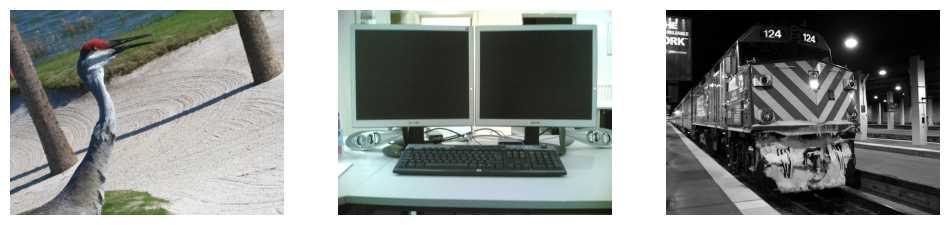

In [3]:
fig = plt.figure(figsize=(12, 4))

rows = 1
cols = 3

for i, img in enumerate(images):
    fig.add_subplot(rows, cols, i+1)
    plt.axis("off")
    plt.imshow(img[:,:,::-1])

## Thresholding

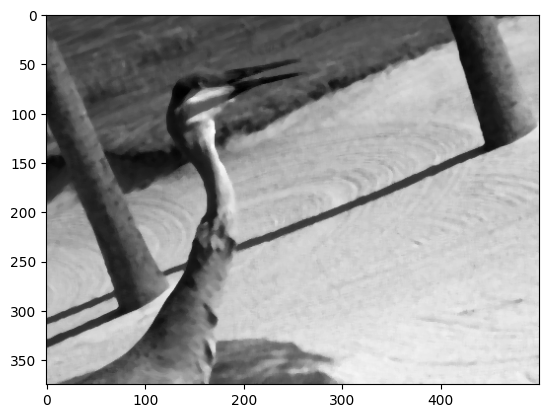

In [76]:
median_blurred = cv2.medianBlur(images_gray[0], 5)
plt.imshow(median_blurred, cmap="gray")

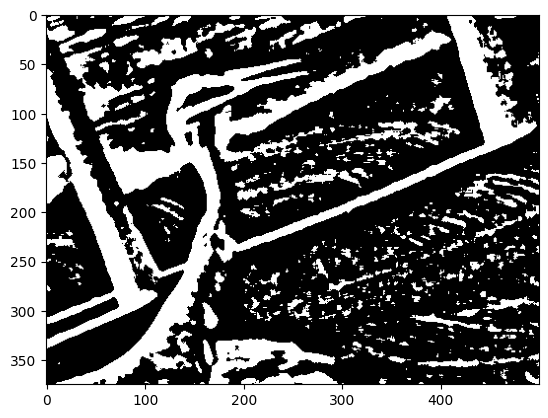

In [77]:
bin_img = cv2.adaptiveThreshold(median_blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 41, 5)
plt.imshow(bin_img, cmap="gray")

In [78]:
gauss_blurred = cv2.GaussianBlur(images[0], (11,11), 0)
lab_img = cv2.cvtColor(gauss_blurred, cv2.COLOR_BGR2Lab)

superpixels = cv2.ximgproc.createSuperpixelSLIC(lab_img, algorithm=cv2.ximgproc.SLIC, region_size=10)

In [70]:
superpixels.getNumberOfSuperpixels()

1900

In [71]:
superpixels.iterate()

In [72]:
superpixel_mask = superpixels.getLabelContourMask()
superpixel_mask.shape

(375, 500)

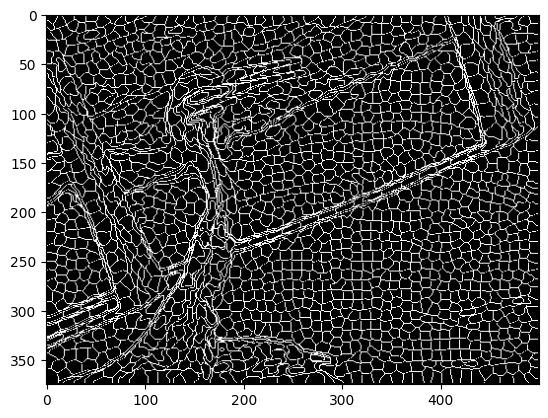

In [73]:
plt.imshow(superpixel_mask, cmap="gray")

In [74]:
superpixel_contour_img = np.zeros(images[0].shape, dtype=np.uint8)

for i in range(images[0].shape[0]):
    for j in range(images[0].shape[1]):
        if superpixel_mask[i,j] == 255:
            superpixel_contour_img[i,j] = [0,255,0]
        else:
            superpixel_contour_img[i,j] = images[0][i,j]

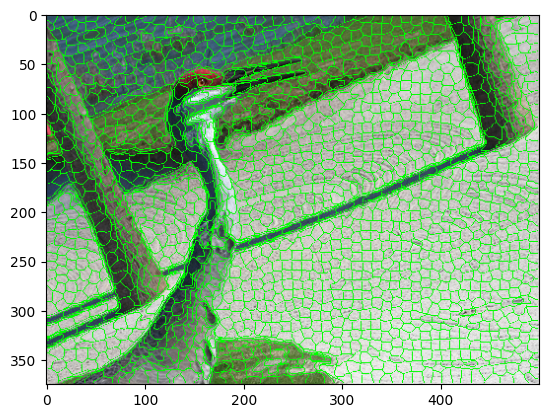

In [75]:
plt.imshow(superpixel_contour_img[:,:,::-1])

In [80]:
edges = cv2.Laplacian(median_blurred, cv2.CV_8U)

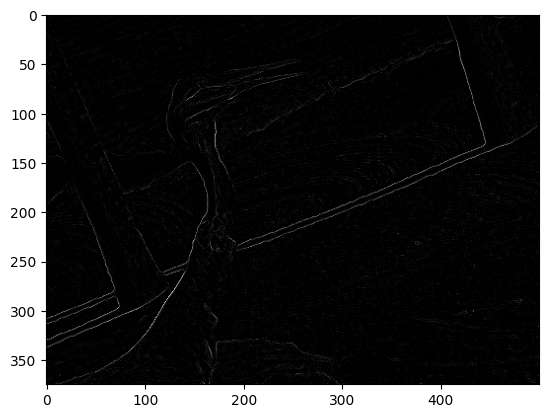

In [81]:
plt.imshow(edges, cmap="gray")